<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Exercise 6 - Working with Outliers </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Objectives

An outlier is a data point that is significantly different from the remaining data. Statistical parameters such as the mean and variance are sensitive to outliers. Outliers may also affect the performance of some machine learning models, such as linear regression or AdaBoost. Therefore, we may want to remove or engineer the outliers in the variables of our dataset. 

How can we engineer outliers? One way to handle outliers is to perform variable discretization with any of the techniques we covered in Practical 5, Performing Variable Discretization. With discretization, the outliers will fall in the lower or upper intervals and, therefore, will be treated as the remaining lower or higher values of the variable. 

An alternative way to handle outliers is to assume that the information is missing, treat the outliers together with the remaining missing data, and carry out any of the missing imputation techniques described in Practical 2, Imputing Missing Data. 

We can also remove observations with outliers from the dataset, or cap the maximum and minimum values of the variables, as we will discuss throughout this practical.

This week we will discuss how to identify and remove outliers from a dataset, a process called trimming, and how to replace outliers by maximum or minimum values. We will also discuss how to use the mean and standard deviation for normally distributed variables or the inter-quartile range for skewed features or using percentiles, in a process commonly known as winsorization.

Pls refer to the `Practical 6.1 - Practical 6.4` in the seperate files for details. 

## Exercise

In `airbnb_sg` dataset, explore the target variable `price`, are there outliers? If yes, which technique (e.g. trimming, capping) is most suitable to handle this variable for this dataset? 

Utilize the proper technique (triming or capping) and the proper method to handle the outliers, after that explore /visualise the target variable `price` again.

In [1]:
# import all the required packages

import pandas as pd
import numpy as np

# sklearn preprocess
from sklearn.model_selection import train_test_split

# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser


# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset and show the info of dataset
data = pd.read_csv('./data/airbnb_sg.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [4]:
# find numerical variables
num_cols = [c for c in data.columns if data[c].dtypes !='O']
data[num_cols].isnull().mean().sort_values()

id                                0.000000
host_id                           0.000000
latitude                          0.000000
longitude                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
reviews_per_month                 0.348805
dtype: float64

In [5]:
data[num_cols].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


count     7907.000000
mean       169.332996
std        340.187599
min          0.000000
25%         65.000000
50%        124.000000
75%        199.000000
max      10000.000000
Name: price, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


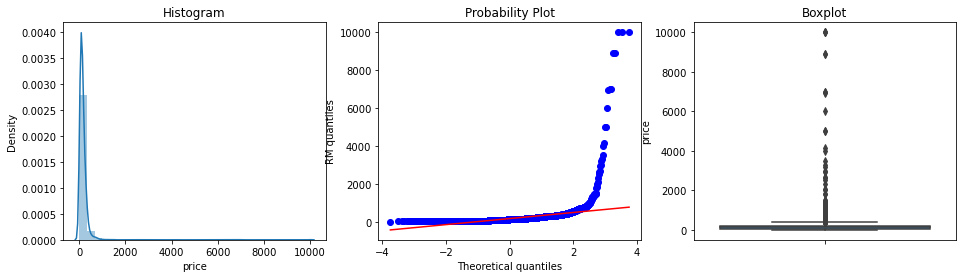

None


(258.0, 35.0)

In [6]:
# Task 1: explore the distributuion of price variable
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

print(data['price'].describe())
print(diagnostic_plots(data, 'price'))
#Given the number and values of the outliers, I doubt using the SD from mean method would be appropriate
#due to the resulting larger value of the mean. As such, I will be using the arbitrary percentile method.
#I have also reduced the upper boundary as the standard 95% is a much larger value compared to the majority.

def find_boundaries(df, variable):
    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.85)
    return upper_boundary, lower_boundary
price_UL, price_LL = find_boundaries(data, 'price')
price_UL, price_LL

In [7]:
# Task 2: Apply trimming OR capping techniques (whichever you think suitable) on the price varaible. 
#I have chosen trimming such that it removes the outliers. 
#Due to the number of outliers on the upper limmit, I feel like capping would cause a left skewed distribution.
#As such, I have chosen trimming as it seems to give us a more normal distribution.

#Flagging the outliers
outliers_price = np.where(data['price'] > price_UL, True,
                       np.where(data['price'] < price_LL, True, False))
#Trimming the outliers
trimmed_data = data.loc[~outliers_price]
data.shape, trimmed_data.shape

((7907, 16), (6350, 16))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


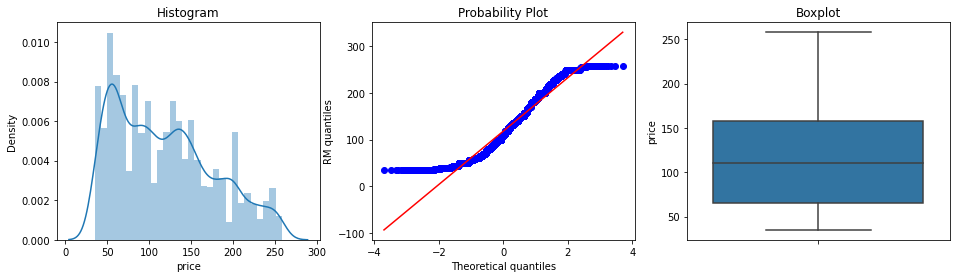

In [8]:
# Task 3: Visualise the distribution of price variable after trimming or capping.

diagnostic_plots(trimmed_data,'price')

#As shown below, the histogram shows that it is still right skewed, however much less than before trimming.
#The probability plot also shows a more linear relationship.